**Super Market Sales Analytics **

A Supermarket is a self-service shop offering a wide variety of food, beverages and household products, organized into sections. The growth of super markets in most populated cities is increasing and market competitions are also high. The Super Market Sales Analytics is used to analyze the sales of different products in a super market located in different cities.



1. Perform exploratory analysis on the data and describe your understanding of the data.
2. Perform data wrangling / pre-processing.
   a. E.g., missing data, normalization, discretization, etc.,
3. Apply any two feature selection engineering techniques
4. Compare the two selected feature engineering techniques.
5. Provide a high-level description of Machine Learning models – association rules and random forest to predict.
6. Compare the performance of the two classifiers – association rules and random forest.





INSTALLING NTLK,GENISM,svgling

In [ ]:
!pip install nltk
!pip install gensim
!pip install svgling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 KB 9.7 MB/s eta 0:00:00


CHECKING THE DATA LENGTH AND CONTENT

In [ ]:
messages = [line.rstrip() for line in open('RestaurantReview.csv')]
print(len(messages))

1001


In [ ]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')

0  Review,Liked


1 Wow... Loved this place.,1


2 Crust is not good.,0


3 Not tasty and the texture was just nasty.,0


4 Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1


5 The selection on the menu was great and so were the prices.,1


6 Now I am getting angry and I want my damn pho.,0


7 Honeslty it didn't taste THAT fresh.),0


8 The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.,0


9 The fries were great too.,1




IMPORTING ALL THE REQUIRED LIBRARIES

In [ ]:
import pandas as pd #Pandas
import nltk # Natural Language Tool Kit
import numpy as np #NUMPY
import matplotlib.pyplot as plt
from nltk.corpus import stopwords # to remove stopword
from nltk.stem.porter import PorterStemmer # for Stemming propose
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
import re
from sklearn.feature_extraction.text import TfidfTransformer
import gensim
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag, word_tokenize, RegexpParser
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Importing Restaurant Reviews Dataset

In [ ]:
Rest_rev = pd.read_csv('RestaurantReview.csv')
Rest_rev.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
#info() method gives the information about the data frame. It will give the number of columns, column labels, number of non-null entries, the data type of the column, memory usage.
Rest_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0    Review  1000 non-null   object
 1   Liked    1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
Rest_rev.isna().sum()

 Review    0
Liked      0
dtype: int64

In [ ]:
#It will give total count, mean, standard deviation, minimum value, maximum value, 25% of data, 50% of data, 75% of data.
Rest_rev.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [ ]:
Rest_rev[:10]

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [ ]:
Rest_rev.groupby('Liked').describe()

Review                                    
        count unique                     top freq
Liked                                            
0         500    497  The food was terrible.    2
1         500    499      I love this place.    2

In [ ]:
Rest_rev[' Review']

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name:  Review, Length: 1000, dtype: object

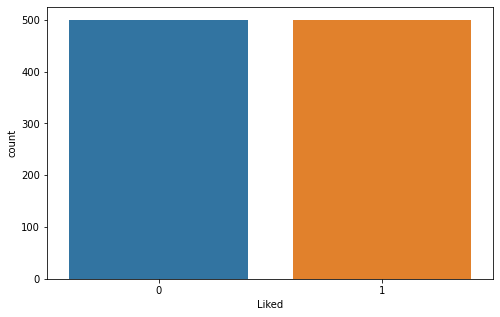

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=Rest_rev.Liked);

 **Cleaning the dataset**

In [ ]:
# stopwords is a list of unwanted words like the,and,of,etc...
# corpus is a collection of text.
# Stemming means taking the root of the word eg. loved, loving, will love -> love
# This will reduce different versions of the same word and will hence reduce the sparsity of matrix
nltk.download('stopwords')
corpus = []
for i in range (0, 1000):
    # Removing unnecessary punctuations and numbers except letters and replacing removed words with space.
    cleaned_Review = re.sub('[^a-zA-Z]', ' ', Rest_rev[' Review'][i])
    # Converting review to lowercase
    cleaned_Review = cleaned_Review.lower()
    # Converting review to list(of strings)
    cleaned_Review = cleaned_Review.split()
    # Loop through all words and keep those which are not in stopwords list.
    # set is much faster than a list and is considered when the review is very large eg. an article,a book
    ps = PorterStemmer()
    cleaned_Review = [ps.stem(word) for word in cleaned_Review if not word in set(stopwords.words('english'))]
    # Joining back the review list to a string with each word seperated by a space.
    cleaned_Review = ' '.join(cleaned_Review)
    corpus.append(cleaned_Review)
    print(corpus)

Output hidden; open in https://colab.research.google.com to view.

WORD CLOUD

In [ ]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(cleaned_Review)

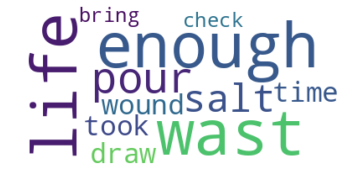

In [ ]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Creating the Bag of Words model**

In [ ]:
# To extract max 1500 feature.
# "max_features" is attribute to
# experiment with to get better results
cv = CountVectorizer(max_features = 1500)

# X contains corpus (dependent variable)
X = cv.fit_transform(corpus).toarray()

# y contains answers if review
# is positive or negative
y = Rest_rev.iloc[:, 1].values

Splitting the dataset into the Training set and Test set

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

Fitting a Predictive Model - MultinomialNB

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

Precision, Accuracy, Recall Values

In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))
print("Classification Report is:\n",classification_report(y_test,y_pred))

Precision: 0.684 / Recall: 0.883 / Accuracy: 0.73
Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.57      0.67        97
           1       0.68      0.88      0.77       103

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.72       200
weighted avg       0.75      0.73      0.72       200



Confusion Matirx

In [ ]:

cm = confusion_matrix(y_test,y_pred)
cm

array([[55, 42],
       [12, 91]])

<Axes: >

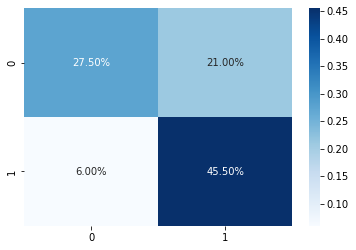

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')

# **TF-IDF Model**

In [ ]:

#tf idf
tf_idf = TfidfVectorizer()
#applying tf idf to training data
X_tf = tf_idf.fit_transform(corpus).toarray()
y_tf = Rest_rev.iloc[:, 1].values

Splitting the dataset into the Training set and Test set

In [ ]:
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf, y_tf, test_size = 0.20, random_state = 0)

Fitting a Predictive Model - MultinomialNB

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train_tf, y_train_tf)

GaussianNB()

Predicting test value

In [ ]:
y_pred_tf = classifier.predict(X_test_tf)

Confusion Matirix

In [ ]:

cm_tf = confusion_matrix(y_test_tf,y_pred_tf)
cm_tf

array([[57, 40],
       [16, 87]])

<Axes: >

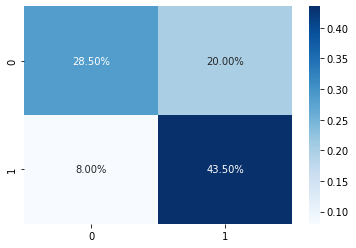

In [ ]:
sns.heatmap(cm_tf/np.sum(cm_tf), annot=True,
            fmt='.2%', cmap='Blues')

Precison, Recall, Accuracy

In [ ]:
precision = precision_score(y_test_tf, y_pred_tf)
recall = recall_score(y_test_tf, y_pred_tf)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))
print("Classification Report is:\n",classification_report(y_test_tf,y_pred_tf))

Precision: 0.685 / Recall: 0.845 / Accuracy: 0.73
Classification Report is:
               precision    recall  f1-score   support

           0       0.78      0.59      0.67        97
           1       0.69      0.84      0.76       103

    accuracy                           0.72       200
   macro avg       0.73      0.72      0.71       200
weighted avg       0.73      0.72      0.71       200



# **Word2Vec Model**

Clean data using the built in cleaner in gensim

In [ ]:
Rest_rev['Review_clean'] = Rest_rev[' Review'].apply(lambda x: gensim.utils.simple_preprocess(x))
Rest_rev.head()

,Review,Liked,Review_clean
0,Wow... Loved this place.,1,"[wow, loved, this, place]"
1,Crust is not good.,0,"[crust, is, not, good]"
2,Not tasty and the texture was just nasty.,0,"[not, tasty, and, the, texture, was, just, nasty]"
3,Stopped by during the late May bank holiday of...,1,"[stopped, by, during, the, late, may, bank, ho..."
4,The selection on the menu was great and so wer...,1,"[the, selection, on, the, menu, was, great, an..."


Splitting the dataset into the Training set and Test set

In [ ]:
X_trainW2V, X_testW2V, y_trainW2V, y_testW2V = train_test_split(Rest_rev['Review_clean'],
                                                    Rest_rev['Liked'], test_size=0.2)

Train the word2vec model

In [ ]:
w2v_model = gensim.models.Word2Vec(X_trainW2V,
                                   window=5,
                                   min_count=2)

Representing all of the words that our Word2Vec model learned a vector for

In [ ]:
w2v_model.wv.index_to_key

['the',
 'and',
 'was',
 'to',
 'is',
 'it',
 'this',
 'of',
 'food',
 'for',
 'not',
 'in',
 'place',
 'good',
 'we',
 'very',
 'service',
 'my',
 'that',
 'great',
 'with',
 'you',
 'are',
 'so',
 'had',
 'be',
 'have',
 'but',
 'they',
 'back',
 'here',
 'were',
 'on',
 'go',
 'like',
 'at',
 'all',
 'our',
 'time',
 'will',
 'there',
 'as',
 'just',
 'an',
 'would',
 'ever',
 'their',
 'really',
 'best',
 'if',
 'one',
 'also',
 'restaurant',
 'only',
 'been',
 'again',
 'up',
 'friendly',
 'from',
 'out',
 'what',
 'delicious',
 'amazing',
 'never',
 'no',
 'by',
 'your',
 'don',
 've',
 'eat',
 'nice',
 'can',
 'made',
 'get',
 'vegas',
 'staff',
 'me',
 'when',
 'chicken',
 'definitely',
 'which',
 'experience',
 'pretty',
 'won',
 'some',
 'too',
 'us',
 'came',
 'love',
 'going',
 'has',
 'did',
 'got',
 'or',
 'disappointed',
 'say',
 'pizza',
 'bad',
 'he',
 'think',
 'how',
 'much',
 'even',
 'first',
 'more',
 'better',
 'quality',
 'didn',
 'could',
 'night',
 'minutes',


Find the most similar words to "gold" based on word vectors from our trained model

In [ ]:
w2v_model.wv.most_similar('shower')

[('how', 0.8405447602272034),
 ('had', 0.8342821002006531),
 ('delicious', 0.8342320919036865),
 ('times', 0.8338887095451355),
 ('good', 0.8328977823257446),
 ('my', 0.8313111066818237),
 ('day', 0.8301963806152344),
 ('us', 0.8296371102333069),
 ('can', 0.8293529748916626),
 ('would', 0.8282771110534668)]

In [ ]:
#Generated aggregated sentence vectors based on the word vectors for each word in the sentence
words = set(w2v_model.wv.index_to_key)
X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_trainW2V])
X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_testW2V])

<ipython-input-42-def2561d70e2>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
<ipython-input-42-def2561d70e2>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])


In [ ]:
for i, v in enumerate(X_train_vect):
    print(len(X_trainW2V.iloc[i]), len(v))

3 2
5 5
8 8
4 3
14 13
6 6
19 19
11 10
22 20
18 18
10 8
4 4
10 7
9 6
6 5
12 11
2 2
11 11
4 3
13 9
3 3
12 11
6 6
9 9
11 10
7 5
16 14
15 10
14 12
3 3
20 18
21 17
12 12
22 21
14 12
17 15
6 3
3 3
15 14
8 8
7 6
23 21
20 18
5 4
6 6
10 10
13 10
13 12
5 3
10 7
24 20
22 19
13 13
11 10
15 15
7 6
3 3
6 6
2 1
20 16
16 16
3 1
11 10
8 7
4 4
6 5
9 9
5 5
4 4
5 3
22 20
8 6
4 3
10 9
3 3
24 24
12 10
24 21
12 10
4 3
11 10
17 16
6 5
22 21
10 10
9 9
5 3
9 6
9 8
8 8
8 7
8 8
10 8
3 3
8 6
22 20
4 4
17 15
26 24
21 17
3 3
3 3
8 8
11 11
19 15
10 9
5 5
12 11
2 2
7 6
9 8
3 2
9 5
8 7
10 9
12 11
9 7
16 16
19 17
5 5
10 9
11 9
4 3
12 10
16 12
24 21
20 19
3 2
6 6
8 7
4 4
7 5
16 16
16 15
12 12
3 3
21 17
14 12
3 3
20 15
11 8
10 10
6 4
15 14
8 7
8 7
9 8
4 3
12 10
6 4
3 3
11 9
15 15
5 5
4 4
7 6
13 10
6 6
8 6
19 16
4 4
19 17
13 10
14 12
15 11
22 21
8 8
9 8
15 10
10 7
15 10
4 4
5 4
14 12
6 6
28 27
17 15
10 10
7 6
19 18
5 5
5 5
11 10
15 11
4 4
11 10
8 8
22 19
20 15
3 2
15 14
7 4
27 24
9 8
8 8
6 5
18 16
7 6
27 22
22 19
15 15
6 4

In [ ]:
# Computing sentence vectors by averaging the word vectors for the words contained in the sentence
X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))

X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

In [ ]:
#Testing the length of the X_train_vect_avg
for i, v in enumerate(X_train_vect_avg):
    print(len(X_trainW2V.iloc[i]), len(v))

3 100
5 100
8 100
4 100
14 100
6 100
19 100
11 100
22 100
18 100
10 100
4 100
10 100
9 100
6 100
12 100
2 100
11 100
4 100
13 100
3 100
12 100
6 100
9 100
11 100
7 100
16 100
15 100
14 100
3 100
20 100
21 100
12 100
22 100
14 100
17 100
6 100
3 100
15 100
8 100
7 100
23 100
20 100
5 100
6 100
10 100
13 100
13 100
5 100
10 100
24 100
22 100
13 100
11 100
15 100
7 100
3 100
6 100
2 100
20 100
16 100
3 100
11 100
8 100
4 100
6 100
9 100
5 100
4 100
5 100
22 100
8 100
4 100
10 100
3 100
24 100
12 100
24 100
12 100
4 100
11 100
17 100
6 100
22 100
10 100
9 100
5 100
9 100
9 100
8 100
8 100
8 100
10 100
3 100
8 100
22 100
4 100
17 100
26 100
21 100
3 100
3 100
8 100
11 100
19 100
10 100
5 100
12 100
2 100
7 100
9 100
3 100
9 100
8 100
10 100
12 100
9 100
16 100
19 100
5 100
10 100
11 100
4 100
12 100
16 100
24 100
20 100
3 100
6 100
8 100
4 100
7 100
16 100
16 100
12 100
3 100
21 100
14 100
3 100
20 100
11 100
10 100
6 100
15 100
8 100
8 100
9 100
4 100
12 100
6 100
3 100
11 100
15 100
5 100

Instantiating and fittting a basic GaussianNB model on top of the vectors


In [ ]:
classifier = GaussianNB()
classifier_model = classifier.fit(X_train_vect_avg, y_trainW2V.values.ravel())

Predicting test value

In [ ]:
y_predW2V = classifier_model.predict(X_test_vect_avg)

Precision, Recall, Accuracy

In [ ]:


precision = precision_score(y_testW2V, y_predW2V)
recall = recall_score(y_testW2V, y_predW2V)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))
print("Classification Report is:\n",classification_report(y_testW2V,y_predW2V))

Precision: 0.516 / Recall: 0.49 / Accuracy: 0.73
Classification Report is:
               precision    recall  f1-score   support

           0       0.51      0.54      0.53       100
           1       0.52      0.49      0.50       100

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.52      0.51       200



Confusion Matrix

In [ ]:

cm_W2V = confusion_matrix(y_testW2V,y_predW2V)
cm_W2V

array([[54, 46],
       [51, 49]])

<Axes: >

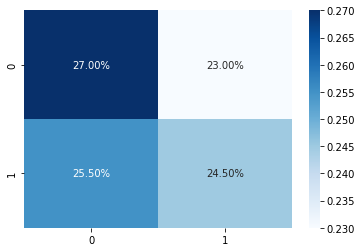

In [ ]:
sns.heatmap(cm_W2V/np.sum(cm_W2V), annot=True,
            fmt='.2%', cmap='Blues')

# **Comparing TF-IDF and Word2Vec model**

Answer :

1.   TF-IDF is a method of weighting a word/term which gives a different weight to each term in a document based on the frequency of terms per document and the frequency of terms in all document.
2.   TF-IDF is used in this study because it provides
better performance, especially in improving recall and precision value.
3. Word2Vec is the neural network that represents words in vector form.
4.  Word2Vec is used in this study because it provides better performance
for the semantic task in determining the association of a word with other similar words.
5. If we comapre the TF-IDF and Word2Vec model performance we can both are same as accuracy of both the model are same.







# **Dependency Parser Tree for 3 sentences**

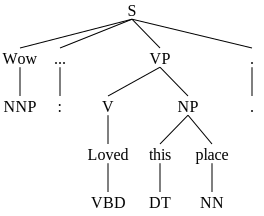

In [ ]:
text1 = Rest_rev[' Review'][0]
# Find all parts of speech in above sentence
tagged = pos_tag(word_tokenize(text1))
#Extract all parts of speech from any text
chunker = RegexpParser("""
                    NP: {<DT>?<JJ>*<NN>} #To extract Noun Phrases
                    P: {<IN>}            #To extract Prepositions
                    V: {<V.*>}           #To extract Verbs
                    PP: {<p> <NP>}       #To extract Prepositional Phrases
                    VP: {<V> <NP|PP>*}   #To extract Verb Phrases
                    """)
# Print all parts of speech in above sentence
output = chunker.parse(tagged)
output

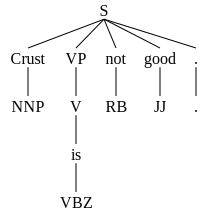

In [ ]:
text2 = Rest_rev[' Review'][1]
# Find all parts of speech in above sentence
tagged = pos_tag(word_tokenize(text2))
output = chunker.parse(tagged)
output

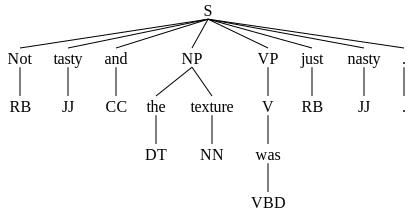

In [ ]:
text3 = Rest_rev[' Review'][2]
# Find all parts of speech in above sentence
tagged = pos_tag(word_tokenize(text3))
output = chunker.parse(tagged)
output